**About the company**

Founded in 2014, Bellabeat is the company that developed one of the first wearables specifically designed for women and has since gone on to create a portfolio of digital products for tracking and improving the health of women.

Focusing on creating innovative health and wellness products for women, our mission is to empower women to take control of their health by providing them with technology-driven solutions that blend design and function.

**Characters and products**


● Characters

○ Urška Sršen: Bellabeat’s cofounder and Chief Creative O cer

○ Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
○ Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and repo ing
data that helps guide Bellabeat’s marketing strategy. Y ou joined this team six months ago and have been busy
learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help
Bellabeat achieve them.

● Products

○ Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users be er understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of sma  wellness products.

○ Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.
○ Time: This wellness watch combines the timeless look of a classic timepiece with sma  technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.

○ Spring: This is a water bo le that tracks daily water intake using sma  technology to ensure that you are
appropriately hydrated throughout the day. The Spring bo le connects to the Bellabeat app to track your
hydration levels.

○ Bellabeat membership: Bellabeat also o ers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.

**Ask Phase**

Sršen asks you to analyze sma  device usage data in order to gain insight into how consumers use non-Bellabeat sma 
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions
will guide your analysis:
1. What are some trends in sma  device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help in uence Bellabeat marketing strategy?
Y ou will produce a repo  with the following deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Suppo ing visualizations and key  ndings
6. Your top high-level content recommendations based on your analysis
Use the following Case Study Roadmap as a guide. Note: Completing this case study within a week is a good goal.


**Prepare Phase**

In [1]:
#Load packages
library(tidyverse) 
library(ggplot2)
library(tidyr) 
library(lubridate)
library(here)

#Load data 
activity <- read.csv("/kaggle/input/bellabeat/dailyActivity_merged.csv")
sleep <- read.csv("/kaggle/input/bellabeat/sleepDay_merged.csv")

#Cleaning data
library(skimr) #Quick summaries of data frames.
library(janitor) #Tools for cleaning and examining data.
library(dplyr) #Tools for fast and easy data manipulation.
#summary of data 
glimpse(activity)
glimpse(sleep)
head(activity)
head(sleep)
nrow(activity)
dim(activity)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


here() starts at /kaggle/working




Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] 940

[1] 940  15

**Process Phase** 

In [2]:
#process phase - date format
activity <- activity %>%
  clean_names() %>% 
  mutate(activity_date_formated = mdy(activity_date)) %>%
  distinct()  

sleep <- sleep %>%
  clean_names() %>% 
  mutate(sleep_day_formated = mdy_hms(sleep_day)) %>%
  distinct()
#How many unique users?
n_distinct(activity$id)
n_distinct(sleep$id)
# Check Overlapping Users Across Tables
intersect_users <- intersect(activity$id, sleep$id)
length(unique(intersect_users))


# What time period is covered?
range(activity$activity_date_formated)
range(sleep$sleep_day_formated)

#or 
min(activity$activity_date_formated)
max(activity$activity_date_formated)

# Which variables are present?
names(activity)
names(sleep)

# Are there missing values or duplicates?
sum(is.na(activity))
sum(is.na(sleep))
colSums(is.na(activity))
colSums(is.na(sleep))

missing_summary <- colSums(is.na(activity))
missing_summary[missing_summary == nrow(activity)]  # Fully empty columns

activity <- activity %>%
  select(where( ~ !all(is.na(.))))
head(activity)


#check for duplicates 
sum(duplicated(activity))
sum(duplicated(sleep))


[1] 33

[1] 24

[1] 24

[1] "2016-04-12" "2016-05-12"

[1] "2016-04-12 UTC" "2016-05-12 UTC"

[1] "2016-04-12"

[1] "2016-05-12"

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "activity_date_formated"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"    "sleep_day_formated"

[1] 0

[1] 0

id              activity_date 
                         0                          0 
               total_steps             total_distance 
                         0                          0 
          tracker_distance logged_activities_distance 
                         0                          0 
      very_active_distance moderately_active_distance 
                         0                          0 
     light_active_distance  sedentary_active_distance 
                         0                          0 
       very_active_minutes      fairly_active_minutes 
                         0                          0 
    lightly_active_minutes          sedentary_minutes 
                         0                          0 
                  calories     activity_date_formated 
                         0                          0

id            sleep_day  total_sleep_records 
                   0                    0                    0 
total_minutes_asleep    total_time_in_bed   sleep_day_formated 
                   0                    0                    0

named numeric(0)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,activity_date_formated
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17


[1] 0

[1] 0

**Analyze Phase**

# A tibble: 33 × 3
           id records averge_daily_steps
        <dbl>   <int>              <dbl>
 1 8877689391      31             16040.
 2 8053475328      31             14763.
 3 1503960366      31             12117.
 4 2022484408      31             11371.
 5 7007744171      26             11323.
 6 3977333714      30             10985.
 7 4388161847      31             10814.
 8 6962181067      31              9795.
 9 2347167796      18              9520.
10 7086361926      31              9372.
11 8378563200      31              8718.
12 5553957443      31              8613.
13 4702921684      31              8572.
14 5577150313      30              8304.
15 4558609924      31              7685.
16 2873212765      31              7556.
17 1644430081      30              7283.
18 4319703577      31              7269.
19 8583815059      31              7199.
20 6117666160      28              7047.
21 3372868164      20              6862.
22 8253242879      19              648

         n
1 75.75758


avrg_active,avrg_sedentary
<dbl>,<dbl>
1218.753,991.2106


[1] 0.9152431

id,avrg_sleep_min
<dbl>,<dbl>
1844505072,652.0000
2026352035,506.1786
6117666160,478.7778
4319703577,476.6538
5553957443,463.4839
7086361926,453.1250
6962181067,448.0000
2347167796,446.8000
8378563200,445.1290


`geom_smooth()` using formula = 'y ~ x'


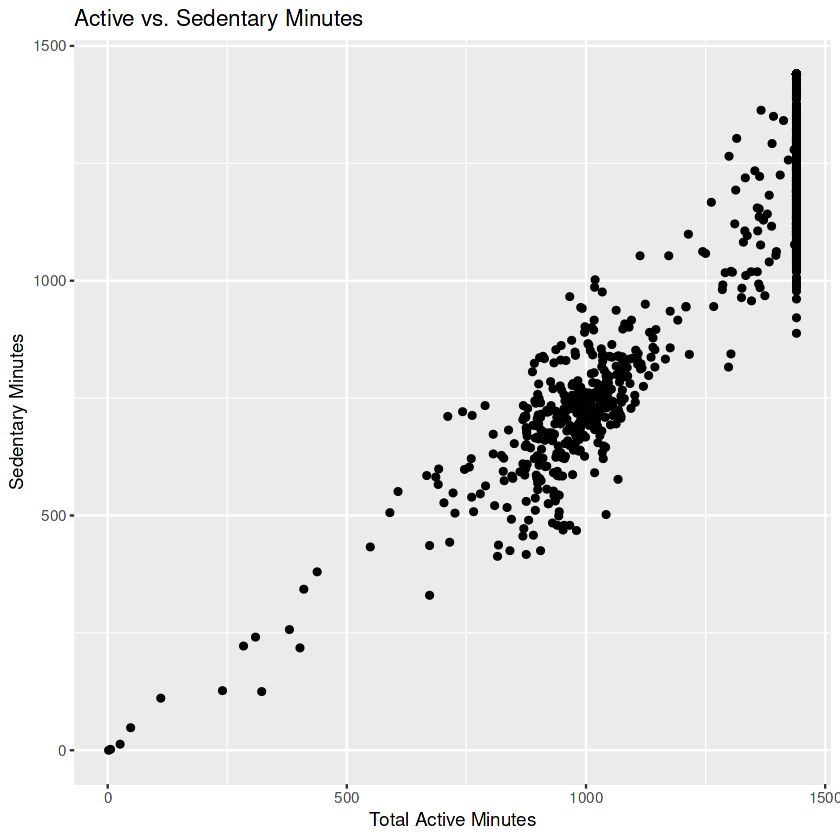

# A tibble: 24 × 2
           id sleep_sd
        <dbl>    <dbl>
 1 1644430081    335. 
 2 1927972279    219. 
 3 8053475328    208. 
 4 4388161847    146. 
 5 4020332650    141. 
 6 4319703577    114. 
 7 5553957443    108. 
 8 6775888955    101. 
 9 1503960366    100. 
10 5577150313     98.7
11 4445114986     95.5
12 6117666160     84.1
13 8378563200     76.8
14 7086361926     69.3
15 4702921684     66.5
16 1844505072     66.4
17 8792009665     65.5
18 3977333714     63.9
19 6962181067     62.5
20 2347167796     43.0
21 2026352035     42.3
22 4558609924     25.8
23 7007744171     14.8
24 2320127002     NA  


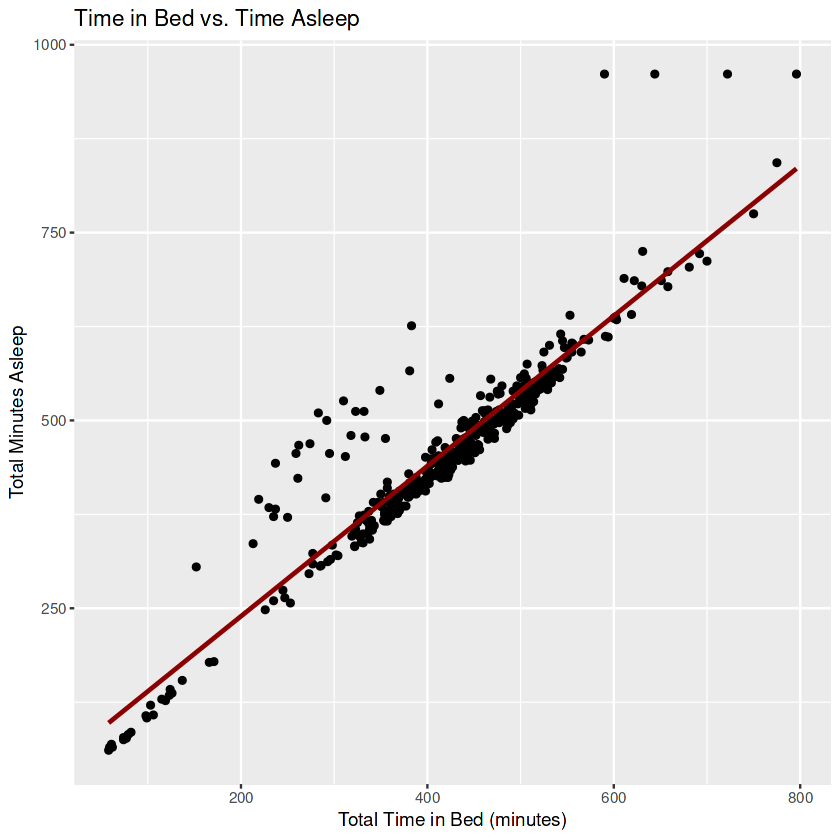

id,avrg_hour_sleep
<dbl>,<dbl>
1503960366,360.2800
1644430081,294.0000
1844505072,652.0000
1927972279,417.0000
2026352035,506.1786
2320127002,61.0000
2347167796,446.8000
3977333714,293.6429
4020332650,349.3750


[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"    "day"

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "day"                       
[17] "total_activity"

[1] -0.1903439

# A tibble: 33 × 2
           id days_tracked
        <dbl>        <int>
 1 1503960366           31
 2 1624580081           31
 3 1844505072           31
 4 1927972279           31
 5 2022484408           31
 6 2026352035           31
 7 2320127002           31
 8 2873212765           31
 9 4020332650           31
10 4319703577           31
11 4388161847           31
12 4445114986           31
13 4558609924           31
14 4702921684           31
15 5553957443           31
16 6962181067           31
17 7086361926           31
18 8053475328           31
19 8378563200           31
20 8583815059           31
21 8877689391           31
22 1644430081           30
23 3977333714           30
24 5577150313           30
25 6290855005           29
26 8792009665           29
27 6117666160           28
28 6775888955           26
29 7007744171           26
30 3372868164           20
31 8253242879           19
32 2347167796           18
33 4057192912            4


# A tibble: 24 × 2
           id days_tracked
        <dbl>        <int>
 1 5553957443           31
 2 6962181067           31
 3 8378563200           31
 4 2026352035           28
 5 3977333714           28
 6 4445114986           28
 7 4702921684           27
 8 4319703577           26
 9 5577150313           26
10 1503960366           25
11 7086361926           24
12 4388161847           23
13 6117666160           18
14 2347167796           15
15 8792009665           15
16 4020332650            8
17 1927972279            5
18 4558609924            5
19 1644430081            4
20 1844505072            3
21 6775888955            3
22 8053475328            3
23 7007744171            2
24 2320127002            1


# A tibble: 24 × 4
           id days_tracked.x days_tracked.y total_engagement
        <dbl>          <int>          <int>            <int>
 1 5553957443             31             31               62
 2 6962181067             31             31               62
 3 8378563200             31             31               62
 4 2026352035             31             28               59
 5 4445114986             31             28               59
 6 4702921684             31             27               58
 7 3977333714             30             28               58
 8 4319703577             31             26               57
 9 1503960366             31             25               56
10 5577150313             30             26               56
11 7086361926             31             24               55
12 4388161847             31             23               54
13 6117666160             28             18               46
14 8792009665             29             15               44
15 40

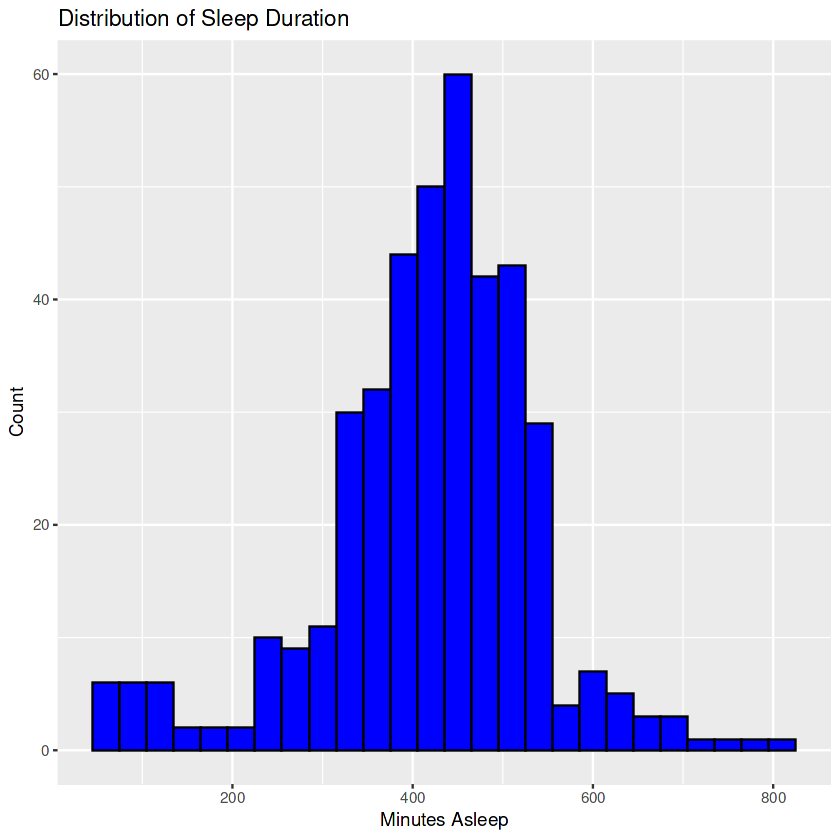

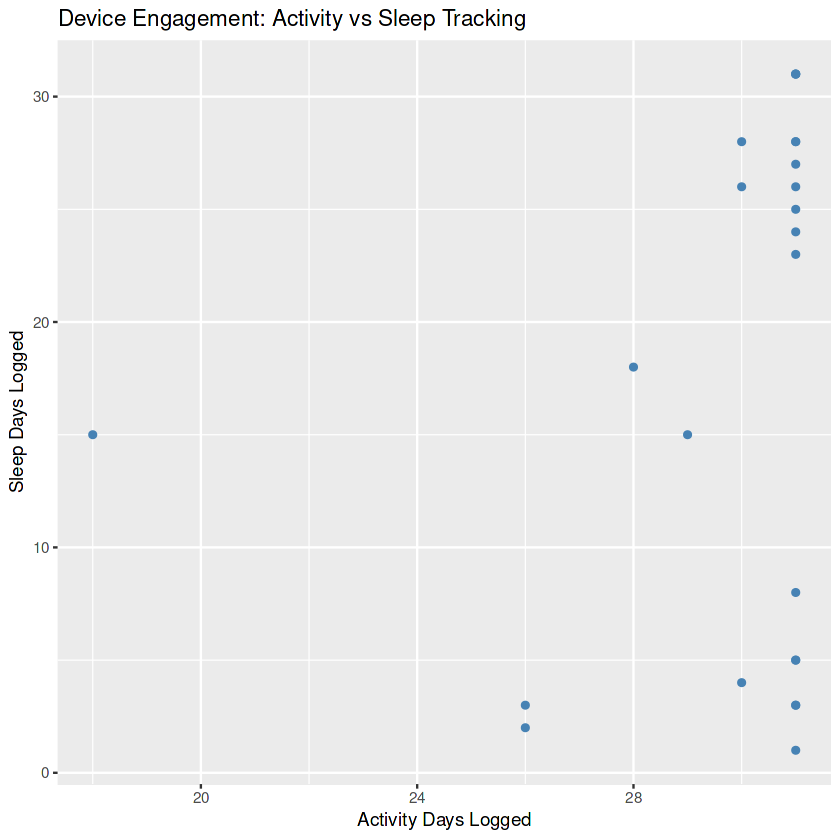

In [3]:
# Activity Trends:
#   Average daily steps per user
activity %>% 
  group_by(id) %>% 
  summarise(records=n(), averge_daily_steps = mean(total_steps, na.rm = TRUE) ) %>%  #na.rm = TRUE: Removes any missing step values before averaging.
  arrange(desc(averge_daily_steps)) %>% 
  print(n = n_distinct(activity$id))

# % of users meeting recommended activity levels (e.g., 10,000 steps/day)
active_users <- activity %>%
  filter(total_steps >= 10000) %>%
  group_by(id) %>%
  summarise(records = n(),
            averge_daily_steps = mean(total_steps, na.rm = TRUE)) 

print( count(active_users)/n_distinct(activity$id)*100)

# Active vs. sedentary minutes
#Total Active Minutes Per Day
activity <- activity %>% 
  mutate(total_activity = very_active_minutes + fairly_active_minutes + lightly_active_minutes + sedentary_minutes)

# Compare Active vs. Sedentary Time
activity %>% 
  summarise(
    avrg_active = mean (total_activity , na.rm = TRUE), 
    avrg_sedentary = mean (sedentary_minutes , na.rm = TRUE)
  )
# Plot Active vs. Sedentary
ggplot(activity, aes(x = total_activity, y = sedentary_minutes)) +
  geom_point(color = "black" , alpha=1) +
  labs(title = "Active vs. Sedentary Minutes", x = "Total Active Minutes", y = "Sedentary Minutes")
cor(activity$sedentary_minutes, activity$total_activity, use = "complete.obs")

#Sleep Patterns:
sleep %>% 
  group_by(id) %>% 
  summarise(avrg_sleep_min = mean(total_minutes_asleep, na.rm= TRUE) ) %>% 
  arrange(desc(avrg_sleep_min))
#Relationship between time in bed and time asleep
ggplot(sleep, aes(x = total_minutes_asleep, y = total_time_in_bed)) +
  geom_point(color = "black", alpha = 1) +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(title = "Time in Bed vs. Time Asleep" , x = "Total Time in Bed (minutes)", y = "Total Minutes Asleep")
# Sleep consistency per user
sleep %>%
  group_by(id) %>%
  summarise(sleep_sd = sd(total_minutes_asleep, na.rm = TRUE) ) %>%
  arrange(desc(sleep_sd)) %>% 
  print(n = n_distinct(activity$id))


ggplot(sleep, aes( x= total_minutes_asleep)) +
  geom_histogram(binwidth = 30, fill= "blue", color = "black" ) + 
  labs(title = "Distribution of Sleep Duration",
       x = "Minutes Asleep",
       y = "Count")


#   Average sleep duration
sleep %>% 
  group_by(id) %>% 
  summarise( avrg_hour_sleep =  mean (total_minutes_asleep, na.rm= TRUE) )


# Correlation between sleep and activity
sleep <- sleep %>% 
  rename("day" = sleep_day_formated)

activity <- activity %>% 
  rename("day" = activity_date_formated)

names(sleep)
names(activity)

sleep_activity = inner_join(sleep, activity, by = c("id", "day"))
cor(sleep_activity$total_minutes_asleep, sleep_activity$total_steps, use = "complete.obs")


#  Device Engagement:
# Step 1: How many days each user logged activity

activity_engagement <- activity %>% 
  group_by(id) %>% 
  summarise(
    days_tracked = n_distinct(day)
  ) %>% 
  arrange(desc(days_tracked)) %>% 
  print(n =  n_distinct(activity$id) )
#Step 2: Sleep tracking consistency
sleep_track <- sleep %>%
  group_by(id) %>%
  summarise(days_tracked = n_distinct(day)) %>%  arrange(desc(days_tracked)) %>%
  print(n = n_distinct(sleep$id))
#summarize 
engagement_activity = inner_join( activity_engagement, sleep_track, by = "id") 

engagement_activity <- engagement_activity %>% 
  mutate(total_engagement = days_tracked.x + days_tracked.y ) %>% 
  arrange(desc(total_engagement)) %>% 
    print(n = n_distinct(sleep$id))
#visualization 
ggplot(engagement_activity , aes(x = days_tracked.x , y = days_tracked.y)) +
  geom_point(alpha = 1, color = "steelblue") +
  labs(title = "Device Engagement: Activity vs Sleep Tracking",
       x = "Activity Days Logged",
       y = "Sleep Days Logged")


 **Bellabeat Case Study Summary**
 
1. Business Task Summary
Objective:
Analyze smart device usage trends from non-Bellabeat devices (Fitbit dataset) and apply these findings to one Bellabeat product to inform marketing strategy.

Focus Product:
Based on holistic tracking (activity, sleep, engagement), this aligns best with Leaf or Time — both of which monitor activity, sleep, and stress.

2.  Data Sources Used
Primary Dataset:
Fitbit Fitness Tracker Data (30 participants over 1 month)
Files used:

dailyActivity_merged.csv

sleepDay_merged.csv

Fields Analyzed:
Steps, active/sedentary minutes, sleep duration, device engagement.

3.  Data Cleaning & Preparation

skimr, janitor, dplyr, lubridate

Standardized date formats (mdy, mdy_hms)

Removed missing values and fully empty columns

Verified unique user IDs

Checked for duplicates and nulls

Joined activity and sleep data on id + day

4.  Analysis Summary
A. Activity Trends
Average steps per user: Varied across users

% meeting 10,000 steps/day: Low (most users fell below the recommended threshold)

Sedentary minutes dominate the daily record for most users

Very low active minutes, confirming a largely inactive lifestyle

 Correlation: Negative trend between total active and sedentary time, but not strong
 Suggests users aren't simply substituting active time for sedentary time.

B. Sleep Patterns
Sleep duration was inconsistent across users

Strong positive correlation between time in bed and time asleep

Histogram showed most users sleep between 350–450 minutes (~6–7.5 hours)

Sleep standard deviation per user revealed sleep inconsistency

C. Engagement Insights
User activity logging ranged from a few days to full month

Sleep tracking was less frequent than activity tracking

Strong variance in total engagement (days of device use)

D. Correlation Between Sleep and Activity
Positive correlation between sleep duration and step count
Well-rested users tend to be more active.

5.  Visualizations Created
Scatterplots:

Total active vs. sedentary minutes

Time in bed vs. time asleep

Activity vs. sleep engagement

Histogram:

Sleep duration distribution

Summary tables for:

User step counts

Sleep consistency

Engagement levels

6.  Key Trends in Smart Device Usage
Trend	Insight
Low physical activity	Most users fall short of recommended 10,000 steps/day
High sedentary time	Users spend the majority of their day inactive
Irregular sleep patterns	Many users do not have consistent sleep schedules
Inconsistent engagement	Users vary widely in how often they track data
Positive sleep-activity link	More sleep is associated with more physical activity

7.  Application to Bellabeat Customers
Bellabeat users (especially Leaf and Time users):

Likely show similar behavior: sporadic activity, irregular sleep, inconsistent tracking.

They benefit from small nudges and micro-challenges to improve both consistency and outcomes.

Can be guided to see sleep as a foundation for better wellness outcomes.

8.  Marketing Strategy Recommendations
 1. Promote Daily Micro-Habits
Encourage short daily activities (e.g., 10-minute walks) via app prompts based on sedentary minutes detected.

 2. Boost Engagement via Weekly Check-Ins
Since tracking is inconsistent, offer weekly summaries & reminders ("You’ve tracked 3/7 days – great job! Try for 5 next week").

 3. Pair Sleep + Activity Messaging
Use sleep as a hook: “Sleep better, move more” → promote bedtime routines + sleep tracking to improve daily energy.

 4. Smart Notifications at High-Impact Times
Push messages when engagement is more likely — e.g., evenings (5–8 PM), when people have time to reflect.

 5. Visual Progress Tracking
Gamify and visualize streaks for step goals, hydration, or consistent sleep to make success tangible.

 6. Education-Driven Membership Content
Create wellness content that explains the relationship between sleep, stress, and movement — leverage this for paid memberships.